# CAB420 Linear Regression, Bonus Example: Standardisation and Other Animals
Dr Simon Denman (s.denman@qut.edu.au)

### What is a "Bonus" Example?

These are extra examples that cover content outside the scope of CAB420. It exists becuase of one or more of the following reasons:
* It's closely related to other stuff we're looking at and I wanted to include it, but the course has too much content already, so I punted it here; 
* It's interesting;
* Someone (probably multiple someones if I wrote an example) has asked a question about it before.

You can freely ignore this example if you want. You really don't have to be reading this. You could go outside, go read a book, have a nap, take up a hobby, whatever you want really. The point I want to make here **this example really is optional**. Things here won't appear on an exam, or in an assignment (though you could use this in an assignment if you wanted). But if you're interested, this is here, and if you're reading this, so are you. 

Some things to note with bonus examples:
* These may gloss over details that elsewhere get more coverage. I may skip plots I'd normally include, or gloss over other details. The expecatation is that if you're reading this, you've looked at all the "core" examples and are comfortable with what they're doing. 
* Some bits of code might not be as well explained or explored as you're used to in the other examples. These examples are here for interested students looking to extend their knowledge, and I'm assuming if you're here, you're comfortable figuring code out, debugging stuff, and generally googling about to help work out what something is doing.
* There's no Tl;DR section at the top. If you're here, I'm assuming it's because you're interested and want all the gory details and don't just need the quick summary at the top.
* While my regular examples (the "core" ones) certainly contain their fare share of silly remarks and typos, expect the level of flippancy and the prevalence of typos increase in a bonus example. 

That said, as always, if you are stuggling to follow what I've got in here please shoot me a message. The aim is still for this to be clear enough to follow afterall.

## Overview

Stadnardisation often seems to cause a bit of confusion, particularly around when we do and don't need a constant term. This example tries to have a look at what's going on.

### How Does this Connect to the Rest of CAB420?

It's very much tied into everything else we're doing, and just explores this idea of standardisation, and it's impact on linear regression, in a bit more detail.

In [1]:
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Data

For the purpose of this example, I want very simple data, so I'll make some. We're just creating some simple data almost perfectly follow the line
$y = 10x + 5$

The fact that I'm only adding a small amount of noise means that our models should be able to fit it perfectly.

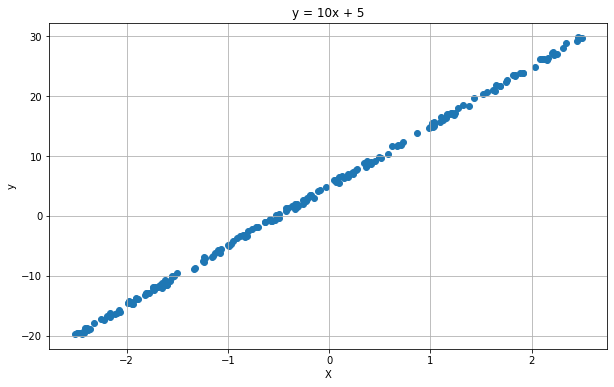

In [2]:
# create some points
X = (numpy.random.rand(200) - 0.5) * 5
# the line I want to learn
y = X*10 + 5

# add a small amount of noise, increase the 0.1 for more noise
X = X + (numpy.random.rand(200) - 0.5)*0.1

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, y, label='Original Data')
ax.set_title('y = 10x + 5')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.grid('on')

We can clearly see that the points follow $y = 10x + 5$, and when $x = 0$, $y = 5$.

Let's start by learning a simple model, we'll add a constant to our X, as we have an intercept, and see what the linear regression returns.

In [3]:
X_w_const = sm.add_constant(X)
model_orig = sm.OLS(y, X_w_const).fit()
print(model_orig.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.795e+05
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:37:49   Log-Likelihood:                -36.776
No. Observations:                 200   AIC:                             77.55
Df Residuals:                     198   BIC:                             84.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0305      0.021    240.087      0.0

Our model learns what we expect, returning an intercept of almost $5$, and a slope of almost $10$. The small difference is just due to the noise in the model.

Now, if we fit the same thing without the constant, we get this.

In [4]:
model_orig_noconst = sm.OLS(y, X).fit()
print(model_orig_noconst.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              1508.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                    8.20e-95
Time:                        13:37:49   Log-Likelihood:                         -604.49
No. Observations:                 200   AIC:                                      1211.
Df Residuals:                     199   BIC:                                      1214.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We no longer get what we expect for the slope, and the model fits much worse.

Plotting things to explore we get:

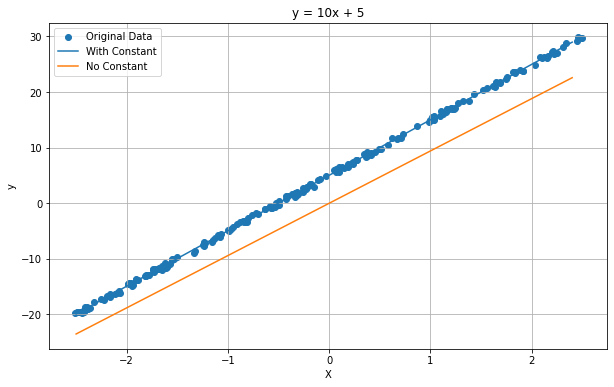

In [5]:
fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, y, label='Original Data')
ax.plot(numpy.arange(-2.5, 2.5, 0.1), model_orig.params[0] + model_orig.params[1]*numpy.arange(-2.5, 2.5, 0.1), label='With Constant')
ax.plot(numpy.arange(-2.5, 2.5, 0.1), model_orig_noconst.params[0]*numpy.arange(-2.5, 2.5, 0.1), label='No Constant')
ax.set_title('y = 10x + 5')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()
ax.grid('on')

Our line with the intercept lines up perfectly (or as good as). The other line is a long way off - though does go through the origin, i.e. when $x=0$, $y=0$. Our second model is missing a key term, the intercept, and so cannot do a good job of fitting the data.

## Transforming the Data

We have two transforms. We can *centre* the data, which is setting the mean to 0. We can also *standardise* the data, which sets the mean to 0 and the standard deviation to 1.

Visualising these we get:

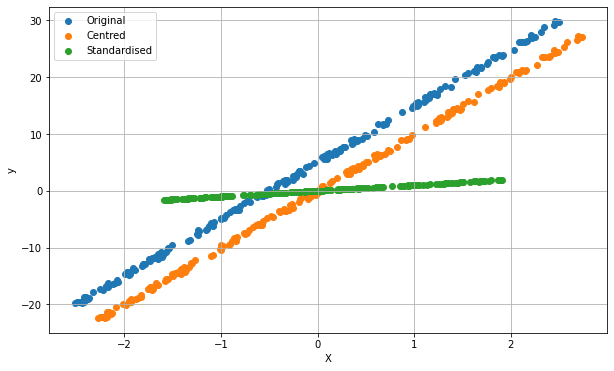

In [6]:
X_mu = numpy.mean(X)
X_sigma = numpy.std(X)
y_mu = numpy.mean(y)
y_sigma = numpy.std(y)

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, y, label = 'Original')
ax.scatter(X - X_mu, y - y_mu, label = 'Centred')
ax.scatter((X - X_mu)/X_sigma, (y - y_mu)/y_sigma, label = 'Standardised')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()
ax.grid('on')

When we centre the data, the slope is unchanged, but the plot is shifted. Critically, it's shifted such that the plot now goes through the origin, i.e. the intercept is 0. 

With standardisation, we see the plot still goes through the origin, but now the slope is changed. 

### Regression with Centred Data

We'll fit some models with the centred data now, one with an intercept, and one without.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.819e+05
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                        0.00
Time:                        13:37:50   Log-Likelihood:                         -36.776
No. Observations:                 200   AIC:                                      75.55
Df Residuals:                     199   BIC:                                      78.85
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

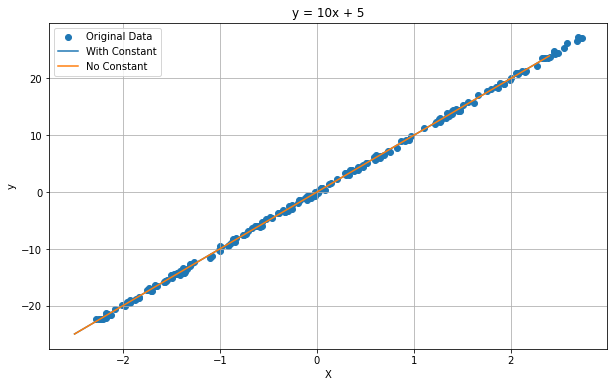

In [7]:
X_centred = (X - X_mu)
y_centred = (y - y_mu)
model_centred = sm.OLS(y_centred, X_centred).fit()
model_centred_w_const = sm.OLS(y_centred, sm.add_constant(X_centred)).fit()
print(model_centred.summary())
print(model_centred_w_const.summary())

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_centred, y_centred, label='Original Data')
ax.plot(numpy.arange(-2.5, 2.5, 0.1), model_centred_w_const.params[0] + model_centred_w_const.params[1]*numpy.arange(-2.5, 2.5, 0.1), label='With Constant')
ax.plot(numpy.arange(-2.5, 2.5, 0.1), model_centred.params[0]*numpy.arange(-2.5, 2.5, 0.1), label='No Constant')
ax.set_title('y = 10x + 5')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()
ax.grid('on')

Both models fit awesomely, but our model with the constant has a learned constant value that is close to 0 - and the p-value of this term is 1, i.e. it is totally useless. This is totally expected, we have centred the data such that the true intercept is 0.

### Regression with Standardised Data

Repeating the above now we standardised data, we see much the same thing.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.819e+05
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                        0.00
Time:                        13:37:50   Log-Likelihood:                          495.48
No. Observations:                 200   AIC:                                     -989.0
Df Residuals:                     199   BIC:                                     -985.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

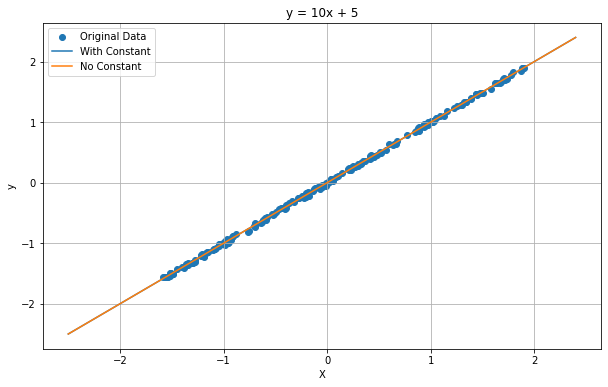

In [8]:
X_std = (X - X_mu) / X_sigma
y_std = (y - y_mu) / y_sigma
model_std = sm.OLS(y_std, X_std).fit()
model_std_w_const = sm.OLS(y_std, sm.add_constant(X_std)).fit()
print(model_std.summary())
print(model_std_w_const.summary())

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_std, y_std, label='Original Data')
ax.plot(numpy.arange(-2.5, 2.5, 0.1), model_std_w_const.params[0] + model_std_w_const.params[1]*numpy.arange(-2.5, 2.5, 0.1), label='With Constant')
ax.plot(numpy.arange(-2.5, 2.5, 0.1), model_std.params[0]*numpy.arange(-2.5, 2.5, 0.1), label='No Constant')
ax.set_title('y = 10x + 5')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()
ax.grid('on')

Both models achieve much the same result, but the constant term in the second model has a p-value of 1 again, and again, this is totally expected.

## Summary

The process of centering the data, and by extension standardisation (because this is centering, following by applying a scale transform) removes the constant term. This has the effect of shifting the data such that it is centred at the origin.

If we get our constant terms mixed up, this can lead to some ill effect. If we forget to include one when we should, our model will likley not fit as well. If we include one when we shouldn't, at best we'll have a redundant term, and at worst we'll have some additional source of noise when our model tries to find a value for something that is not there.